# **Projeto de Análise Exploratória de Dados**
Desmatamento: uma Análise Global e Prováveis Causas



## Aquisição dos Dados

As bibliotecas foram importadas e seguindo o raciocínio das perguntas estipuladas, determinadas variáveis foram abstraídas ou menosprezadas para realizar a análise em si. O dataset específico do Brasil foi utilizado com maior frequência, pois foi identificado ser o mais completo com relação às causas de desmatamento e a partir disso obtivemos novos insights.  




In [1]:
# Importação de todas bibliotecas que iremos utilizar no dataset e realizando a importação de diversos dataset's com a função pd.read().
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/forest.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/forest_area.csv')
df_3 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/soybean_use.csv')
df_4 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/brazil_loss.csv')
df_5 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/vegetable_oil.csv')

## Análise dos Dados


### Estrutura dos Dados

De maneira geral, os datasets apresentam estrutura tabular, com informações arranjadas em 13 a 143.832 linhas e variando de 4 a 14 colunas. Como dito anteriormente, os atributos descrevem dados sobre área desmatada, causas do desmatamento, localizações geográficas, além dos períodos destes episódios, dentre outros. As tabelas estão no formato CSV, em que os tipos de dados são denominados como objeto e como numérico, no caso do int64 e do float64, como mostram os códigos a seguir:

In [ ]:
# Visualização do dataset com a função info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   entity                 475 non-null    object 
 1   code                   467 non-null    object 
 2   year                   475 non-null    int64  
 3   net_forest_conversion  475 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.0+ KB


In [ ]:
# Visualização do dataset com a função info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entity       7846 non-null   object 
 1   code         6774 non-null   object 
 2   year         7846 non-null   int64  
 3   forest_area  7846 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 245.3+ KB


In [ ]:
# Visualização do dataset com a função info()
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9897 entries, 0 to 9896
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entity       9897 non-null   object 
 1   code         8163 non-null   object 
 2   year         9897 non-null   int64  
 3   human_food   9682 non-null   float64
 4   animal_feed  4359 non-null   float64
 5   processed    6253 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 464.0+ KB


In [ ]:
# Visualização do dataset com a função info()
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   entity                           13 non-null     object
 1   code                             13 non-null     object
 2   year                             13 non-null     int64 
 3   commercial_crops                 13 non-null     int64 
 4   flooding_due_to_dams             13 non-null     int64 
 5   natural_disturbances             13 non-null     int64 
 6   pasture                          13 non-null     int64 
 7   selective_logging                13 non-null     int64 
 8   fire                             13 non-null     int64 
 9   mining                           13 non-null     int64 
 10  other_infrastructure             13 non-null     int64 
 11  roads                            13 non-null     int64 
 12  tree_plantations_including_palm  13 no

In [ ]:
# Visualização do dataset com a função info()
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143832 entries, 0 to 143831
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   entity      143832 non-null  object 
 1   code        121199 non-null  object 
 2   year        143832 non-null  int64  
 3   crop_oil    143832 non-null  object 
 4   production  58197 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.5+ MB


## Análise 1.

- Em qual ano que houve mais desmatamento em âmbito global?

**R: O pico mundial de desmatamento foi em 1990 alcançando exatos 1.435.082,0 de área desmatada.**



In [ ]:
# Utilização da função merge para juntarmos os dataset df e df_2.
df_oficial = pd.merge(df, df_2, on = ['entity','code','year'])
df_oficial.head(3)

,entity,code,year,net_forest_conversion,forest_area
0,Algeria,DZA,1990,-8800.0,0.039349
1,Algeria,DZA,2000,33900.0,0.037975
2,Algeria,DZA,2010,7600.0,0.046709


In [ ]:
# Geração de estatística descritivas em todos os atributos quantitivos com a função describe() e utilizando a função applymap para arredondarmos os atributos.
df_oficial.describe().applymap(lambda x:'{:.2f}'.format(x))

,year,net_forest_conversion,forest_area
count,475.00,475.00,475.00
mean,2004.33,-76931.03,1.51
std,9.36,639354.38,9.35
min,1990.00,-7818000.00,0.00
25%,2000.00,-30260.00,0.01
50%,2010.00,0.00,0.09
75%,2015.00,3205.00,0.45
max,2015.00,2360980.00,100.00


In [ ]:
# Utilização da função groupby para agrupamentos o atributo 'year' e utilização do sum() para somarmos todos os dados dos atributos 'net_forest_conversion' e 'forest_area'.
df_oficial_agrupado = df_oficial.groupby('year').sum()
df_oficial_agrupado.head(5)

<ipython-input-11-de9b19a861f8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oficial_agrupado = df_oficial.groupby('year').sum()


,net_forest_conversion,forest_area
year,,
1990,-14350820.0,165.915868
2000,-8381250.0,187.755729
2010,-5836150.0,186.294679
2015,-7974020.0,177.549897


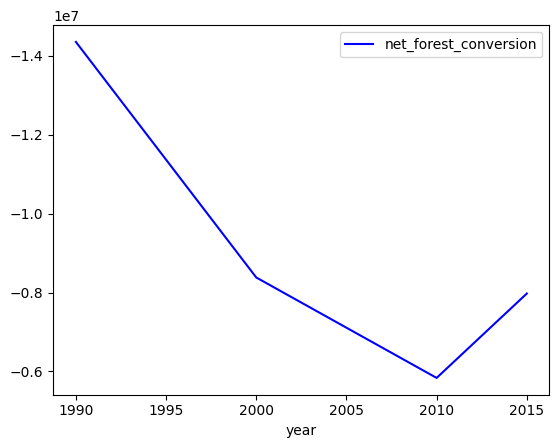

In [ ]:
# Plot de um gráfico de linhas para verificarmos a evolução da área desmatada de 1990 até 2015.
# Conforme a visualização notamos o pico de desmatamento em 1990.
df_oficial_agrupado.plot(y = 'net_forest_conversion', color = 'blue')
plt.gca().invert_yaxis()

## Análise 2.

Qual a maior causa de desmatamento do Brasil?

**R: A maior causa de desmatamento no Brasil foi o desmatamento em áreas de pastos.**

In [ ]:
# Visualização do dataset df_4 com a função head().
df_4.head(5)

,entity,code,year,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
0,Brazil,BRA,2001,280000,0,0,1520000,96000,26000,9000,9000,13000,44000,249000
1,Brazil,BRA,2002,415000,79000,35000,2568000,96000,114000,9000,13000,31000,44000,293000
2,Brazil,BRA,2003,550000,0,35000,2761000,149000,44000,0,9000,35000,26000,358000
3,Brazil,BRA,2004,747000,26000,22000,2564000,131000,79000,0,13000,57000,92000,415000
4,Brazil,BRA,2005,328000,17000,26000,2665000,140000,393000,0,13000,35000,52000,288000


In [ ]:
# Utilização da função isnull().sum() para verificarmos a frequência de dados nulos no dataset.
df_4.isnull().sum()

entity                             0
code                               0
year                               0
commercial_crops                   0
flooding_due_to_dams               0
natural_disturbances               0
pasture                            0
selective_logging                  0
fire                               0
mining                             0
other_infrastructure               0
roads                              0
tree_plantations_including_palm    0
small_scale_clearing               0
dtype: int64

In [ ]:
# Geração de estatística descritivas em todos os atributos quantitivos com a função describe() e utilizando a função applymap para arredondarmos os atributos.
df_4.describe().applymap(lambda x:'{:.2f}'.format(x))

,year,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,2007.00,234846.15,14692.31,31538.46,1561769.23,104846.15,157692.31,5769.23,10076.92,25923.08,36230.77,305769.23
std,3.89,220504.67,21269.64,21344.85,850381.79,38021.59,176505.61,9713.85,4424.58,15140.79,20453.83,54051.14
min,2001.00,52000.00,0.00,0.00,546000.00,44000.00,26000.00,0.00,0.00,9000.00,9000.00,232000.00
25%,2004.00,79000.00,0.00,22000.00,738000.00,87000.00,44000.00,0.00,9000.00,13000.00,26000.00,271000.00
50%,2007.00,118000.00,9000.00,26000.00,1520000.00,96000.00,79000.00,0.00,9000.00,22000.00,35000.00,293000.00
75%,2010.00,328000.00,17000.00,35000.00,2564000.00,131000.00,122000.00,9000.00,13000.00,35000.00,44000.00,310000.00
max,2013.00,747000.00,79000.00,87000.00,2761000.00,166000.00,537000.00,35000.00,17000.00,57000.00,92000.00,415000.00


In [ ]:
# Utilização da função groupby para agrupamentos o atributo 'entity' e utilização do sum() para somarmos todos os dados dos atributos do dataset.
df_agrupado = df_4.groupby('entity').sum()


<ipython-input-16-6829efcf9a78>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrupado = df_4.groupby('entity').sum()


In [ ]:
# Utilização da função drop() para retirarmos a coluna 'year' do dataset.
df_agrupado = df_agrupado.drop('year', axis =1)

In [ ]:
# Visualização do novo dataset df_agrupado gerado a partir do dataset df_4 com a função head().
df_agrupado.head(5)

,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
entity,,,,,,,,,,,
Brazil,3053000,191000,410000,20303000,1363000,2050000,75000,131000,337000,471000,3975000


In [ ]:
# Utilização da função max() para visualizarmos os maiores valores de cada atributo.
# conclusão que o atributo 'pasture' contém o maior entre todos os atributos do dataset, indicando o maior causa de desmatamento no Brasil.
df_agrupado.max(numeric_only=True)

commercial_crops                    3053000
flooding_due_to_dams                 191000
natural_disturbances                 410000
pasture                            20303000
selective_logging                   1363000
fire                                2050000
mining                                75000
other_infrastructure                 131000
roads                                337000
tree_plantations_including_palm      471000
small_scale_clearing                3975000
dtype: int64

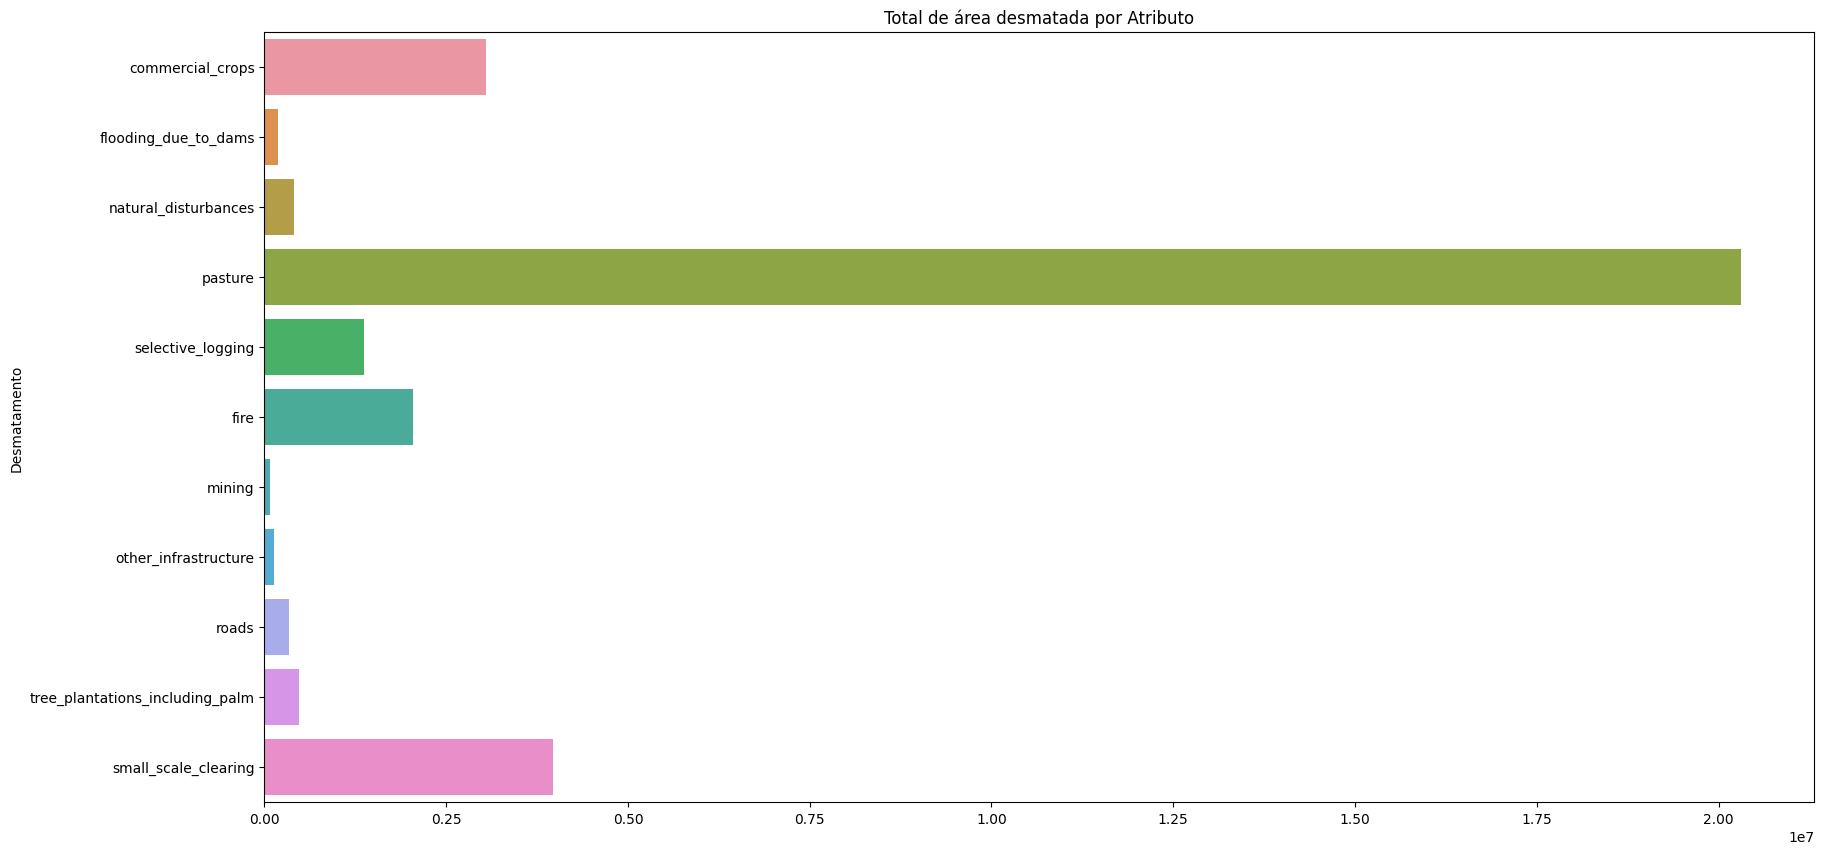

In [ ]:
# Plot de um gráfico de barras na horizontal para visualizarmos graficamente que o atributo 'pasture' é a maior causa de desmatamento no Brasil.
plt.figure(figsize=(20,10))
plt.title('Total de área desmatada por Atributo')
sns.barplot(data= df_agrupado, orient = 'h')
plt.ylabel('Desmatamento')
plt.show()

## Análise 3.

Quais são os dados historicos de destamento no brasil pelo atributo 'pasture'?

**R: O pico de desmatamento pro implantação de áreas de pasto no Brasil ocorreu em 2003.**

In [ ]:
# Visualização do dataset df_4 com a função head().
df_4.head()

,entity,code,year,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
0,Brazil,BRA,2001,280000,0,0,1520000,96000,26000,9000,9000,13000,44000,249000
1,Brazil,BRA,2002,415000,79000,35000,2568000,96000,114000,9000,13000,31000,44000,293000
2,Brazil,BRA,2003,550000,0,35000,2761000,149000,44000,0,9000,35000,26000,358000
3,Brazil,BRA,2004,747000,26000,22000,2564000,131000,79000,0,13000,57000,92000,415000
4,Brazil,BRA,2005,328000,17000,26000,2665000,140000,393000,0,13000,35000,52000,288000


In [ ]:
# Verificando classes, linhas e colunas do dataset com a função info()
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   entity                           13 non-null     object
 1   code                             13 non-null     object
 2   year                             13 non-null     int64 
 3   commercial_crops                 13 non-null     int64 
 4   flooding_due_to_dams             13 non-null     int64 
 5   natural_disturbances             13 non-null     int64 
 6   pasture                          13 non-null     int64 
 7   selective_logging                13 non-null     int64 
 8   fire                             13 non-null     int64 
 9   mining                           13 non-null     int64 
 10  other_infrastructure             13 non-null     int64 
 11  roads                            13 non-null     int64 
 12  tree_plantations_including_palm  13 no

In [ ]:
# Transformando o atributo 'year' em classe string.
df_4['year'] = df_4['year'].apply(str)

In [ ]:
# Geração de estatística descritivas em todos os atributos quantitivos com a função describe() e utilizando a função applymap para arredondarmos os atributos.
df_4.describe().applymap(lambda x:'{:.2f}'.format(x))

,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,234846.15,14692.31,31538.46,1561769.23,104846.15,157692.31,5769.23,10076.92,25923.08,36230.77,305769.23
std,220504.67,21269.64,21344.85,850381.79,38021.59,176505.61,9713.85,4424.58,15140.79,20453.83,54051.14
min,52000.00,0.00,0.00,546000.00,44000.00,26000.00,0.00,0.00,9000.00,9000.00,232000.00
25%,79000.00,0.00,22000.00,738000.00,87000.00,44000.00,0.00,9000.00,13000.00,26000.00,271000.00
50%,118000.00,9000.00,26000.00,1520000.00,96000.00,79000.00,0.00,9000.00,22000.00,35000.00,293000.00
75%,328000.00,17000.00,35000.00,2564000.00,131000.00,122000.00,9000.00,13000.00,35000.00,44000.00,310000.00
max,747000.00,79000.00,87000.00,2761000.00,166000.00,537000.00,35000.00,17000.00,57000.00,92000.00,415000.00


In [ ]:
# Utilização da função groupby para agrupamentos o atributo 'year' e utilização do sum() para somarmos todos os dados dos atributos do dataset.
agrupamento_year_BR = df_4.groupby(by = 'year').sum()
agrupamento_year_BR.head(10)

<ipython-input-26-b3a1f5bba7ca>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupamento_year_BR = df_4.groupby(by = 'year').sum()


,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
year,,,,,,,,,,,
2001,280000,0,0,1520000,96000,26000,9000,9000,13000,44000,249000
2002,415000,79000,35000,2568000,96000,114000,9000,13000,31000,44000,293000
2003,550000,0,35000,2761000,149000,44000,0,9000,35000,26000,358000
2004,747000,26000,22000,2564000,131000,79000,0,13000,57000,92000,415000
2005,328000,17000,26000,2665000,140000,393000,0,13000,35000,52000,288000
2006,188000,17000,26000,1861000,52000,79000,0,9000,17000,26000,306000
2007,79000,9000,22000,1577000,96000,446000,9000,13000,13000,39000,310000
2008,52000,0,17000,1345000,61000,70000,9000,17000,48000,17000,397000
2009,57000,9000,31000,847000,87000,44000,0,9000,9000,35000,301000


In [ ]:
# Criação de novo dataset agrupamento_year_BR_pasture partir do dataset agrupamento_year_BR e selecionando apenas o atributo 'pasture' para análise posterior.
agrupamento_year_BR_pasture = agrupamento_year_BR['pasture']

Text(0, 0.5, 'Desmatamento')

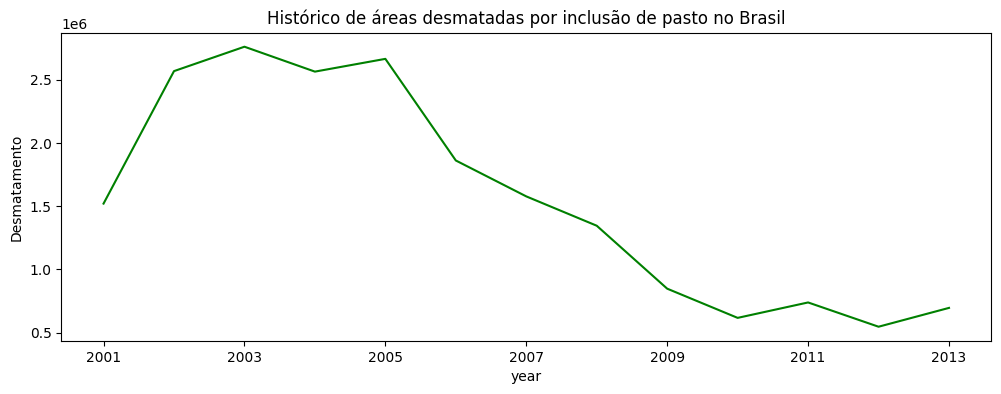

In [ ]:
# Plot de um gráifco de linha para verificarmos o historico de desmatamento pelas inclusão de áreas de pasto.
# Concluíndo que o pico de desmatamento ocorreu em 2003.
plt.figure(figsize=(12,4))
plt.title('Histórico de áreas desmatadas por inclusão de pasto no Brasil')
agrupamento_year_BR_pasture.plot(color = 'green')
plt.ylabel('Desmatamento')



## Análise 4.

Quais países que possuem maior área de desmatamento e qual histórico disso?

R: Os países com maiores índices de desmatamento são em sequência: **Brasil, Indonésia e Tanzânia**


In [ ]:
# Utilização da função merge para mesclarmos os dataset df e df_2.
df_oficial = pd.merge(df, df_2, on = ['entity','code','year'])
df_oficial.head(3)

,entity,code,year,net_forest_conversion,forest_area
0,Algeria,DZA,1990,-8800.0,0.039349
1,Algeria,DZA,2000,33900.0,0.037975
2,Algeria,DZA,2010,7600.0,0.046709


In [ ]:
# Utilização da função value_counts() para verificarmos as quantidades de dados distintos do atributo 'entity'.
df_oficial['entity'].value_counts()

Algeria       4
Monaco        4
Nigeria       4
Niger         4
Nicaragua     4
             ..
Sudan         1
Italy         1
Portugal      1
Madagascar    1
Guinea        1
Name: entity, Length: 132, dtype: int64

In [ ]:
# Utilização da função insull().sum() para verificarmos as quantidades de dados nulos no dataset.
df_oficial.isnull().sum()

entity                   0
code                     8
year                     0
net_forest_conversion    0
forest_area              0
dtype: int64

In [ ]:
# Utilização da função .dropna() para eliminarmos os valores nulos do atributo 'code'.
df_oficial['code'].dropna(inplace = True)

In [ ]:
# Utilização da função groupby para agrupamentos o atributo 'year' e utilização do sum() para somarmos todos os dados dos atributos.
df_oficial_agrupado2 = df_oficial.groupby('entity').sum().round()



<ipython-input-34-8167cb5433a4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_oficial_agrupado2 = df_oficial.groupby('entity').sum().round()


In [ ]:
# Utilização da função drop() para eliminarmos as colunas 'forest_area' e 'year' que não serão utilizados na análise.
df_oficial_agrupado2.drop(['forest_area','year'], axis = 1, inplace = True)

In [ ]:
# Ordenando o dataset pelo atributo 'net_forest_conversion' em forma crescente.
# Identificando os países que causaram mais desmatamento em esfera global.
df_oficial_agrupado2.sort_values(by = 'net_forest_conversion', ascending = True)

,net_forest_conversion
entity,
World,-22886000.0
Brazil,-10723950.0
Indonesia,-2467520.0
Tanzania,-1585000.0
Myanmar,-1357120.0
...,...
Russia,621910.0
Vietnam,652220.0
United States,902000.0


In [ ]:
# Geração de estatística descritivas em todos os atributos quantitivos com a função describe() e utilizando a função applymap para arredondarmos os atributos.
df_oficial_agrupado2.describe().applymap(lambda x:'{:.2f}'.format(x))

,net_forest_conversion
count,132.00
mean,-276835.15
std,2339724.18
min,-22886000.00
25%,-84980.00
50%,0.00
75%,21405.00
max,8220540.00


In [ ]:
# Corte de dados para selecionarmos as linhas dos países 'Brazil', 'Indonesia' e 'Tanzania'
#e atribuindo a uma nova variável chamada selecao_top3.
selecao_top3 = df_oficial_agrupado2[(df_oficial_agrupado2['net_forest_conversion'] > -22886000.0) & (df_oficial_agrupado2['net_forest_conversion'] <=-1585000.0 )]

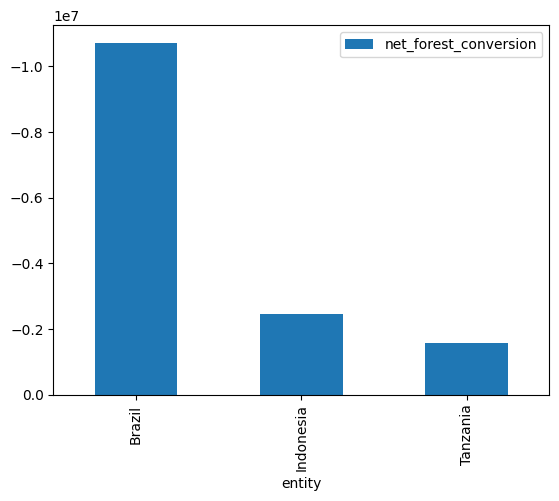

In [ ]:
# Plot de um gráfico de barras para verificarmos a quantidade de área desmatada pelos 3 paises que mais causaram desmatamento.
selecao_top3.plot(kind = 'bar')
plt.gca().invert_yaxis()


In [ ]:
# Seleção de linhas dos páises e eliminação de colunas que não serão utilizadas.
selecao_Brazil = df_oficial[df_oficial['entity'] == 'Brazil'][['entity','year','net_forest_conversion']]
selecao_Indonesia = df_oficial[df_oficial['entity'] == 'Indonesia'][['entity','year','net_forest_conversion']]
selecao_Tanzania = df_oficial[df_oficial['entity'] == 'Tanzania'][['entity','year','net_forest_conversion']]

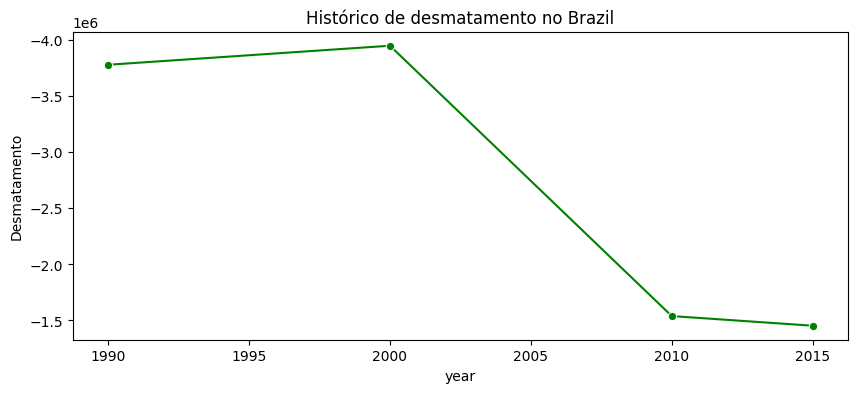

In [ ]:
# Plot de um gráfico de linhas para verificarmos a evolução da área desmatada de 1990 até 2015 no Brasil.
# Concluíndo que o pico de área desmatada ocorreu em 2000.
plt.figure(figsize=(10,4))
plt.title('Histórico de desmatamento no Brazil')
sns.lineplot(data =selecao_Brazil, x = 'year', y = 'net_forest_conversion', color = 'Green', markers=True, marker='o')
plt.gca().invert_yaxis()
plt.ylabel('Desmatamento')
plt.show()

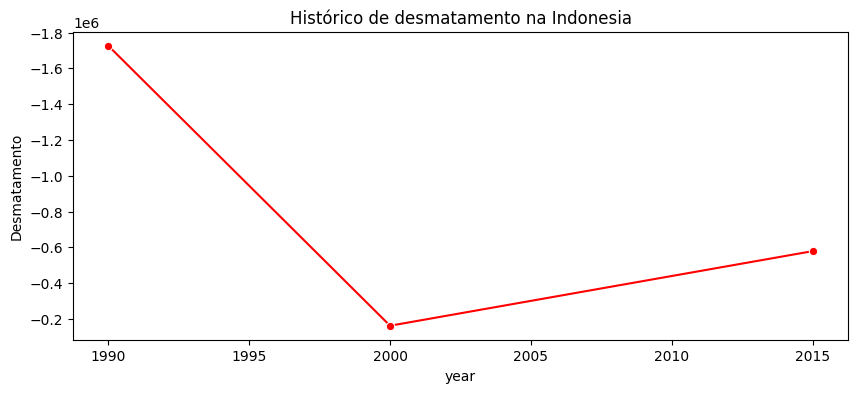

In [ ]:
# Plot de um gráfico de linhas para verificarmos a evolução da área desmatada de 1990 até 2015 na Indonesia.
# Concluíndo que o pico de área desmatada ocorreu em 1990.
plt.figure(figsize=(10,4))
plt.title('Histórico de desmatamento na Indonesia')
sns.lineplot(data =selecao_Indonesia, x = 'year', y = 'net_forest_conversion', color = 'Red',markers=True, marker='o')
plt.gca().invert_yaxis()
plt.ylabel('Desmatamento')
plt.show()

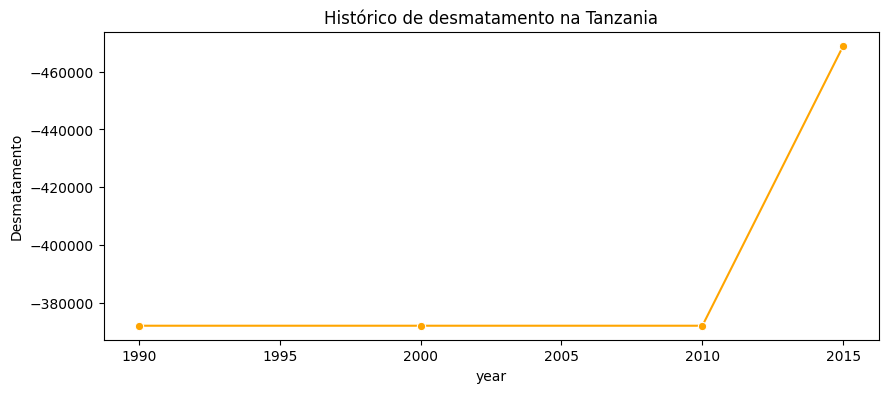

In [ ]:
# Plot de um gráfico de linhas para verificarmos a evolução da área desmatada de 1990 até 2015 na Tanzania.
# Concluíndo que o pico de área desmatada ocorreu em 2015.
plt.figure(figsize=(10,4))
plt.title('Histórico de desmatamento na Tanzania')
sns.lineplot(data =selecao_Tanzania, x = 'year', y = 'net_forest_conversion', color = 'Orange', markers=True, marker='o')
plt.gca().invert_yaxis()
plt.ylabel('Desmatamento')
plt.show()

## Análise 5.

No Brasil, em qual ano houve maior desmatamento por conversão?

R: Em 2004 foi o ápice de desmatamento por conversão.

In [ ]:
# Visualização do dataset df_4 com a função head().
df_4.head(5)

,entity,code,year,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
0,Brazil,BRA,2001,280000,0,0,1520000,96000,26000,9000,9000,13000,44000,249000
1,Brazil,BRA,2002,415000,79000,35000,2568000,96000,114000,9000,13000,31000,44000,293000
2,Brazil,BRA,2003,550000,0,35000,2761000,149000,44000,0,9000,35000,26000,358000
3,Brazil,BRA,2004,747000,26000,22000,2564000,131000,79000,0,13000,57000,92000,415000
4,Brazil,BRA,2005,328000,17000,26000,2665000,140000,393000,0,13000,35000,52000,288000


In [ ]:
# Criação de um novo dataset a partir do dataset df_4 e selecionando os atributos que serão analisados.
selecao_palm = df_4[['entity', 'year', 'tree_plantations_including_palm']]

In [ ]:
# Transformando o atributo 'year' em classe string.
selecao_palm['year'] = selecao_palm['year'].apply(str)

<ipython-input-47-760ffa3fc124>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecao_palm['year'] = selecao_palm['year'].apply(str)


In [ ]:
# Geração de estatística descritivas em todos os atributos quantitivos com a função describe() e utilizando a função applymap para arredondarmos os atributos.
selecao_palm.describe().applymap(lambda x:'{:.2f}'.format(x))

,tree_plantations_including_palm
count,13.00
mean,36230.77
std,20453.83
min,9000.00
25%,26000.00
50%,35000.00
75%,44000.00
max,92000.00


In [ ]:
# Utilização da função groupby para agrupamentos o atributo 'tree_plantations_including_palm' e utilização do sum() para somarmos todos os dados dos atributos do dataset.
selecao_palm.sort_values(by = 'tree_plantations_including_palm', ascending = False)

,entity,year,tree_plantations_including_palm
3,Brazil,2004,92000
4,Brazil,2005,52000
0,Brazil,2001,44000
1,Brazil,2002,44000
6,Brazil,2007,39000
8,Brazil,2009,35000
12,Brazil,2013,35000
2,Brazil,2003,26000
5,Brazil,2006,26000
10,Brazil,2011,26000


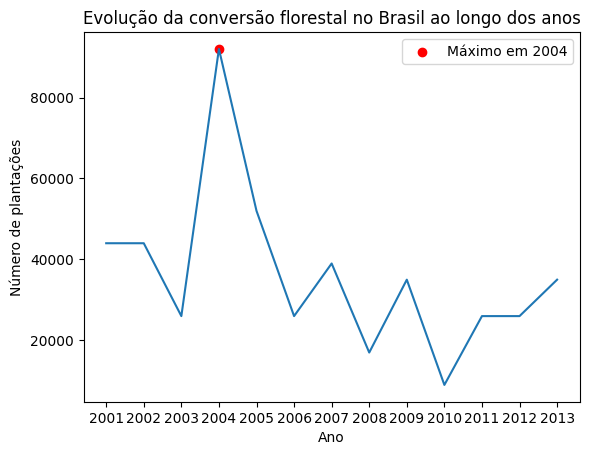

In [ ]:
# Criação das variaveis valor_maximo e ano_maximo para selecionarmos o ano e a maior frequência de desmatamento por conversão florestal.
valor_maximo = selecao_palm['tree_plantations_including_palm'].max()
ano_maximo = selecao_palm.loc[selecao_palm['tree_plantations_including_palm'].idxmax(), 'year']

# Plot de um gráifco de linha para verificarmos o historico de desmatamento por conversão florestal.
# Concluíndo que o pico de desmatamento ocorreu em 2004.
plt.plot(selecao_palm['year'], selecao_palm['tree_plantations_including_palm'])
plt.title("Evolução da conversão florestal no Brasil ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Número de plantações")
plt.scatter(ano_maximo, valor_maximo, color='red', label=f'Máximo em {ano_maximo}')
plt.legend()

plt.show()

## Análise 6.

A produção de soja tem grande influência no desmatamento?

R: Sim, Pela análise de correlação é possível dizer que as variáveis 'production' e net_forest_conversion são correlacionadas de forma negativa pois alcançaram um nível de -0.86.


In [ ]:
# Visualização do dataset df com a função head().
df.head(2)

,entity,code,year,net_forest_conversion
0,Algeria,DZA,1990,-8800.0
1,Algeria,DZA,2000,33900.0


In [ ]:
# Visualização do dataset df_5 com a função head().
df_5.head(2)

,entity,code,year,crop_oil,production
0,Afghanistan,AFG,1961,Soybean,NaN
1,Afghanistan,AFG,1961,Sesame,2253.0


In [ ]:
# Utilização da função merge para juntarmos os dataset df e df_5.
df_soja = pd.merge(df,df_5, on = ['entity','code','year'])
df_soja.head(2)

,entity,code,year,net_forest_conversion,crop_oil,production
0,Algeria,DZA,1990,-8800.0,Soybean,NaN
1,Algeria,DZA,1990,-8800.0,Sesame,NaN


In [ ]:
# Verificando classes, linhas e colunas do dataset com a função info()
df_soja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3718 entries, 0 to 3717
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   entity                 3718 non-null   object 
 1   code                   3718 non-null   object 
 2   year                   3718 non-null   int64  
 3   net_forest_conversion  3718 non-null   float64
 4   crop_oil               3718 non-null   object 
 5   production             1603 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 203.3+ KB


In [ ]:
# Verificando a frequência de valores nulos no dataset por atributo utilizando a função isnull().sum().
df_soja.isnull().sum()

entity                      0
code                        0
year                        0
net_forest_conversion       0
crop_oil                    0
production               2115
dtype: int64

In [ ]:
# Utilização da função dropna para retirarmos todos valores nulos no dataset.
df_soja.dropna(inplace = True)

In [ ]:
# utilização da função dtypes para verifarmos a classe de cada atributo no dataset.
df_soja.dtypes

entity                    object
code                      object
year                       int64
net_forest_conversion    float64
crop_oil                  object
production               float64
dtype: object

In [ ]:
# Transformando o atributo 'year' em classe string.
df_soja['year'] = df_soja['year'].apply(str)

In [ ]:
# Seleção de amostra no ano de 2010 e seleção de colunas que serão utilizadas na análise.
df_soja_2010 = df_soja[df_soja['year'] == '2010'][['entity','year','net_forest_conversion','production']]


In [ ]:
# Utilização da função groupby para agrupamentos o atributo 'entity' e utilização do sum() para somarmos todos os dados dos atributos do dataset.
df_agrupamento_soja_2010 = df_soja_2010.groupby('entity').sum().round()

<ipython-input-61-5c91f8ea6ce4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrupamento_soja_2010 = df_soja_2010.groupby('entity').sum().round()


In [ ]:
# Visualização do novo dataset agrupado utilizando a função head()
df_agrupamento_soja_2010.head(5)

,net_forest_conversion,production
entity,,
Algeria,38000.0,66753.0
Argentina,-2010600.0,8272125.0
Australia,7806480.0,403033.0
Austria,18000.0,199483.0
Azerbaijan,36320.0,11546.0


In [ ]:
# Verificando a correlação entre os atributos 'net_forest_conversion' e 'production'.
# Concluíndo que existe uma correlação negativa considerada de -86% entre a produção de soja e a área desmatada nos paises.
df_agrupamento_soja_2010.corr()

,net_forest_conversion,production
net_forest_conversion,1.000000,-0.864144
production,-0.864144,1.000000


In [ ]:
# Ordenando o dataset pelo atributo 'production' com a função sort_values()
df_agrupamento_soja_2010.sort_values(by = 'production', ascending = False)

,net_forest_conversion,production
entity,,
World,-62413000.0,148643411.0
China,21304470.0,19482912.0
United States,2475000.0,11039634.0
Argentina,-2010600.0,8272125.0
India,2664000.0,7864650.0
...,...,...
Montenegro,0.0,180.0
Maldives,0.0,151.0
Tokelau,0.0,29.0


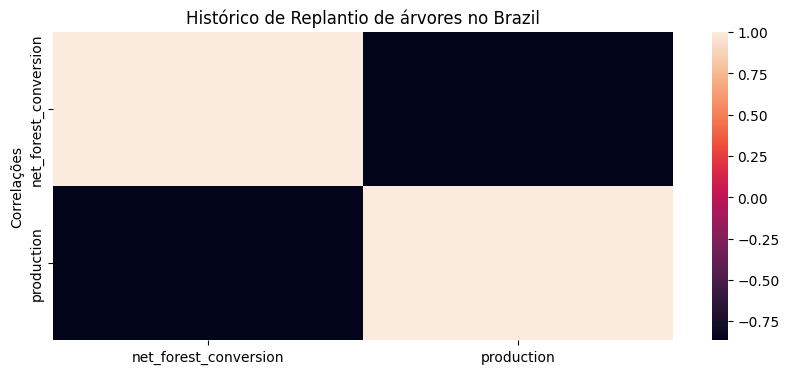

In [ ]:
# Plot de um gráfico de calor para verificarmos a correlação entre os atributos 'net_forest_conversion' e 'production'.
plt.figure(figsize=(10,4))
plt.title('Histórico de Replantio de árvores no Brazil')
sns.heatmap(df_agrupamento_soja_2010[['net_forest_conversion','production']].corr())
plt.ylabel('Correlações')
plt.show()

## Análise 7.

Quais são as tendências temporais do desmatamento no Brasil comparadas ao desmatamento global entre 1990 e 2015?


R.: O desmatamento global mostra uma **tendência geral de aumento de área de conversão florestal líquida até 2005**, seguido por uma leve diminuição a partir de então. **Esse padrão sugere que**, globalmente, **houve um aumento nas taxas de desmatamento até meados dos anos 2000**, possivelmente devido a fatores como expansão agrícola, crescimento populacional e demanda por recursos naturais. **O Brasil apresenta uma tendência relativamente constante de desmatamento**, com uma ligeira redução em um período entre 2005 e 2010. Embora o gráfico mostre uma redução na taxa de desmatamento durante esses anos, a taxa global ainda continua significativa, indicando desafios persistentes na redução do desmatamento.



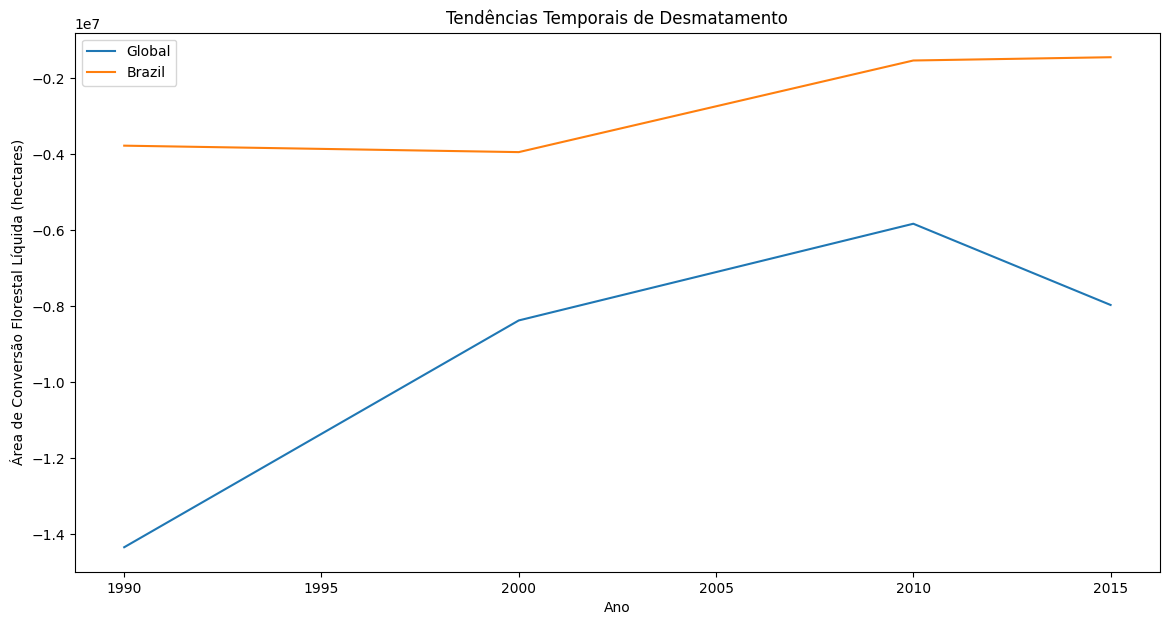

In [12]:
# Análise de tendências temporais de desmatamento global e no Brasil
brazil_forest_df = df[df['entity'] == 'Brazil']
global_forest_df = df.groupby('year').sum().reset_index()

# Visualizando essas tedências
plt.figure(figsize=(14, 7))
sns.lineplot(data=global_forest_df, x='year', y='net_forest_conversion', label='Global')
sns.lineplot(data=brazil_forest_df, x='year', y='net_forest_conversion', label='Brazil')
plt.title('Tendências Temporais de Desmatamento')
plt.xlabel('Ano')
plt.ylabel('Área de Conversão Florestal Líquida (hectares)')
plt.legend()
plt.show()

# Conclusão

A análise desses dados sugere que o desmatamento é um problema grave em diversos países ao redor do mundo, com Brasil e Indonésia liderando a lista de países com os maiores índices de desmatamento. No Brasil, a maior causa é a implantação de áreas de pasto. Além disso, o ano de maior número de conversão florestal no Brasil foi em 2004.
O estudo também revela que a produção de soja está correlacionada negativamente com o desmatamento por conversão, alcançando o nível de 86%, indicando que a expansão da produção de soja pode estar contribuindo para este cenário. Em suma, é necessário adotar uma abordagem integrada e multifacetada para resolver os problemas da exploração desenfreada das áreas florestais e, ainda, inclua ações de fiscalização, incentivos à conservação, práticas agrícolas sustentáveis, restauração de áreas desmatadas, educação e conscientização e políticas públicas eficazes.
